<h1>Domain clustering using L2-norm & L2-norm</h1>

In [57]:
import PIL.Image as pilimg # for reading image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
x = np.zeros((225,225))
y = np.zeros((225,225))
size_row = 225
size_col = 225
i = 0
while(i < 225):
    x[i,:] = i
    y[:,i] = i
    i = i+1

xy = np.array((y,x))
xy = xy.transpose()
xy = xy.reshape(-1,2)
xy = xy.transpose()
count = xy.shape[1]

In [59]:
def Distance(x, y):

    d = (x - y) ** 2   
    s = np.sum(d)

    return(s)

In [60]:
def generateCluster(cluster_num, image_num):# K-means알고리즘을 시작하기 위한 함수
    
    # 클러스터의 개수
    k = cluster_num
    # 각 픽셀에 대해 소속 클러스터를 표시하기 위한 라벨
    cluster_label = np.zeros(image_num)                   
    # 클러스터 마다의 centroid
    average_image = np.zeros((2, cluster_num), dtype=int) 
    # centroid와 각 pixel간의 distance를 담은 배열   
    distance = np.zeros((cluster_num, image_num), dtype=float)
    
    return k, cluster_label, average_image, distance

In [61]:
def initializeLabel(cluster_num, cluster_label): # 클러스터링 라벨 초기화
    random_seed=np.random.rand(len(cluster_label))*100 
    #variable that will be substituted to the label
    
    for i in range(len(cluster_label)):                   
        random_seed[i] = int(random_seed[i])
        random_seed[i] = random_seed[i] % cluster_num # 랜덤하게 초기화
    for i in range(len(cluster_label)):                       
        cluster_label[i] = random_seed[i]
    return

def computeCentroid(cluster_num, list_image,cluster_label):  #compute the average(center) of 
                                                #listimage sharing  same label
    sum = np.zeros((2 ,cluster_num))      # 각 클러스터의 픽셀 값의 합
    num = np.zeros(cluster_num)           # 각 클러스터의 픽셀 개수(dividance)
    
    for i in range(list_image.shape[1]): # 전체 픽셀 개수만큼 진행       
        sum[:,int(cluster_label[i])] = sum[:,int(cluster_label[i])] + list_image[:,i]
        # must change the type of label[i] to type(int)
        num[int(cluster_label[i])] = num[int(cluster_label[i])]+1
        # count the number
    for i in range(cluster_num):
        sum[:,i] /= num[i]                         # sum goes to be a mean value
    return sum

In [62]:
def assignLabel(list_image,average_image,label,distance): #compute the distance 
                                                #average images and images. 
                                                #And update the label of points
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):
            distance[j,i]=Distance(average_image[:,j],list_image[:,i])
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):               
            if distance[j,i]==distance[:,i].min():  #when thd distance is minimum
                label[i]=j                          #update label
    return

def represent(label,list_label,num):#num : 0 ~ k-1. we don't know what the most number 
                                    #in the cluster(num)'s is. this funstion 
                                    #will return the most number of certain cluster.
    num_arr=np.zeros(10)
    num_rep=-1
    for i in range(len(label)):
        if(label[i]==num):
            num_arr[list_label[i]]+=1
    for i in range(10):
        if(num_arr.max()==num_arr[i]):
            num_rep=i
    return num_rep                  #return the number that appeared the most

# def computeAccuracy(label,list_label,cluster_num): #compute the accuracy
#     sum=0
#     num_arr=np.zeros(10)
#     for j in range(cluster_num):
#         num=0
#         for ii in range(10):
#             num_arr[ii]=0
#         for i in range(len(label)):
#             if(label[i]==j):
#                 num_arr[list_label[i]]+=1
#                 num+=1
#         sum+=num_arr.max()/num
#     return 100*sum/cluster_num  #accuracy will be returned 

def plotEnergyAndAccuracy(energy,accuracy): #plot the energy and accuracy
    plt.figure(1)
    x=np.arange(1,len(energy)+1)
    plt.plot(x, energy, 'b', label="energy")
    plt.plot(x, accuracy, 'r', label="accuracy")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
def plotEnergy(energy): #plot the energy
    plt.figure(1)
    x = np.arange(1,len(energy)+1)
    plt.title('Energy Curve')
    plt.plot(x, energy, 'b', label="energy")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [63]:
def plotCentoidImages(average_pixel, cluster_label):  
    # draw image using average_pixels 
    
    plt.figure(1)
    # centroid pixel로만 만들 이미지 배열
    output_pixel = np.zeros((3, count), dtype=int) 
    for i in range(count):
        output_pixel[:,i] = average_pixel[:,int(cluster_label[i])]

    output_pixel = output_pixel.transpose()
    output_pixel = output_pixel.reshape(size_row, size_col, 3)
    plt.title('output image')
    plt.imshow(output_pixel)
    return

In [64]:
def computeEnergy(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                             #images and corresponding average images(center)
    return energy_sum/distance.shape[1]

In [65]:
def visualization(average_image,k):
    final_image = np.zeros((3,k), dtype = int)
    color_red = [244, 67, 54]
    color_purple = [171, 71, 188]
    color_blue = [66, 165, 245]
    color_sky = [77, 208, 225]
    color_green = [102, 187, 106]
    color_yellow = [255, 238, 88]
    for i in range(k):
        if(i == 0):
            final_image[:,i] = color_red
        if(i == 1):
            final_image[:,i] = color_purple
        if(i == 2):
            final_image[:,i] = color_green
        if(i == 3):
            final_image[:,i] = color_blue
        if(i == 4):
            final_image[:,i] = color_yellow
        if(i == 5):
            final_image[:,i] = color_sky
    return final_image

<h2>Use L2-norm</h2>

<h3>K=2</h3>

1 Centroid 1 : 61.892857142857146 133.46554993678888
1 Centroid 2 : 162.10516335479792 90.53529806818631
2 Centroid 1 : 59.17730720606827 128.03445006321112
2 Centroid 2 : 164.82060601272073 95.96618338403192
3 Centroid 1 : 57.473707083876576 123.38003239698155
3 Centroid 2 : 166.51983092359959 100.62131626767797
4 Centroid 1 : 56.56558154235145 119.82458912768648
4 Centroid 2 : 167.43222849919013 104.17571998577806
5 Centroid 1 : 56.1218394437421 117.28618836915297
5 Centroid 2 : 167.8759530675937 106.7140204637933
6 Centroid 1 : 55.9150962032318 115.55039310971515
6 Centroid 2 : 168.07825709093783 108.45002765268231
7 Centroid 1 : 55.82201414404804 114.37126150685472
7 Centroid 2 : 168.17132811882752 109.62901951489295
8 Centroid 1 : 55.780609221287186 113.58717553632808
8 Centroid 2 : 168.21272813462906 110.41301256221854
9 Centroid 1 : 55.76414348925411 113.05578381795196
9 Centroid 2 : 168.23363489116264 110.94425789120216
10 Centroid 1 : 55.75560998735777 112.68884323640961
10 Ce

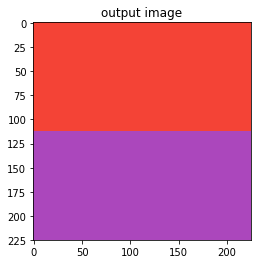

In [66]:
k,cluster_label,average_image,distance=generateCluster(2, count) #2 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)

<h3>K=3</h3>

1 Centroid 1 : 184.49120449548008 111.3796726117762
1 Centroid 2 : 72.10969426176013 162.61288217279983
1 Centroid 3 : 84.63492395702525 42.375191851541786
2 Centroid 1 : 182.88560760353022 115.94421814890246
2 Centroid 2 : 69.90567335243553 166.48154727793695
2 Centroid 3 : 78.5508742499516 46.16213949287051
3 Centroid 1 : 181.5910455910456 116.5906087906088
3 Centroid 2 : 68.57494216486059 168.59107512480213
3 Centroid 3 : 76.66507177033493 48.18471417778897
4 Centroid 1 : 180.92947617003006 116.47928295405754
4 Centroid 2 : 68.06072545340838 169.69155722326454
4 Centroid 3 : 75.65025307754796 49.140161219771294
5 Centroid 1 : 180.61751716064492 116.17458628212633
5 Centroid 2 : 67.97898867160306 170.2858046959053
5 Centroid 3 : 74.94972241282515 49.65660283201297
6 Centroid 1 : 180.47083752714943 115.80309371192456
6 Centroid 2 : 68.0950139913508 170.64767234800306
6 Centroid 3 : 74.42124313529706 49.97010733899151
7 Centroid 1 : 180.39266656099753 115.44333491837058
7 Centroid 2 : 

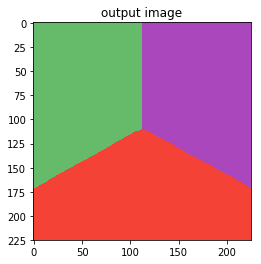

In [67]:
k,cluster_label,average_image,distance=generateCluster(3, count) #3 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)

<h3>K=4</h3>

1 Centroid 1 : 62.1960037319235 173.20618877313015
1 Centroid 2 : 177.6667999086341 136.20049109182276
1 Centroid 3 : 184.60324483775813 40.17551622418879
1 Centroid 4 : 83.4605323660144 52.615337454656924
2 Centroid 1 : 60.86732839368097 169.7096323221026
2 Centroid 2 : 173.87522976251745 153.83545327549444
2 Centroid 3 : 179.51489572989075 42.99801390268123
2 Centroid 4 : 67.397558314009 54.79648069840404
3 Centroid 1 : 58.48413350257597 169.35212424400805
3 Centroid 2 : 171.1133133881825 160.31024682124158
3 Centroid 3 : 174.29551820728292 48.11814725890356
3 Centroid 4 : 61.78270589932208 56.07457089283139
4 Centroid 1 : 57.08231565929819 169.26294635956097
4 Centroid 2 : 169.60597764088524 163.68575557076585
4 Centroid 3 : 171.47529369563267 51.253340507577796
4 Centroid 4 : 58.95264062149847 56.49107342944648
5 Centroid 1 : 56.34365665775822 169.12977519257979
5 Centroid 2 : 168.8332691863598 165.56185051189286
5 Centroid 3 : 170.0027961362481 53.07015760040671
5 Centroid 4 : 57.

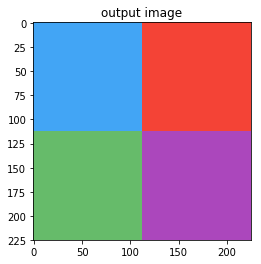

In [68]:
k,cluster_label,average_image,distance=generateCluster(4, count) #4 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)

<h2>Use L1-norm</h2>

In [70]:
def Distance(x, y):
    d = abs(x - y)
    s = np.sum(d)
    return(s)

<h3>K=2</h3>

1 Centroid 1 : 55.752222178327344 111.75000987634812
1 Centroid 2 : 168.25 112.25
2 Centroid 1 : 55.752222178327344 111.75000987634812
2 Centroid 2 : 168.25 112.25


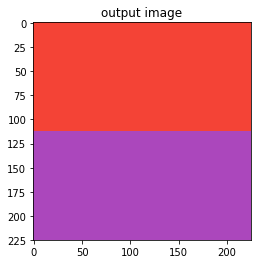

In [71]:
k,cluster_label,average_image,distance=generateCluster(2, count) #2 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)

<h3>K=3</h3>

1 Centroid 1 : 112.0 168.5
1 Centroid 2 : 112.0 55.5
1 Centroid 3 : 112.0 112.0
2 Centroid 1 : 112.0 182.5
2 Centroid 2 : 112.0 41.5
2 Centroid 3 : 112.0 112.0
3 Centroid 1 : 112.0 186.0
3 Centroid 2 : 112.0 38.0
3 Centroid 3 : 112.0 112.0
4 Centroid 1 : 112.0 187.0
4 Centroid 2 : 112.0 37.0
4 Centroid 3 : 112.0 112.0
5 Centroid 1 : 112.0 187.0
5 Centroid 2 : 112.0 37.0
5 Centroid 3 : 112.0 112.0


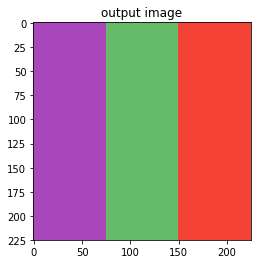

In [74]:
k,cluster_label,average_image,distance=generateCluster(3, count) #3 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)

<h3>K=4</h3>

1 Centroid 1 : 168.0 168.5
1 Centroid 2 : 168.0 112.0
1 Centroid 3 : 168.0 55.5
1 Centroid 4 : 55.5 112.0
2 Centroid 1 : 156.1652386780906 183.65361077111382
2 Centroid 2 : 168.0 112.0
2 Centroid 3 : 156.1652386780906 40.34638922888617
2 Centroid 4 : 47.65703022339028 112.0
3 Centroid 1 : 147.27062505433366 187.39789620099106
3 Centroid 2 : 170.84731643460668 112.0
3 Centroid 3 : 147.27062505433366 36.60210379900895
3 Centroid 4 : 44.03944629475437 112.0
4 Centroid 1 : 141.49614791987673 188.2477315528163
4 Centroid 2 : 174.75952145757876 112.0
4 Centroid 3 : 141.49614791987673 35.7522684471837
4 Centroid 4 : 42.52617079889807 112.0
5 Centroid 1 : 138.18356835261335 188.09685046018745
5 Centroid 2 : 177.83433219178082 112.0
5 Centroid 3 : 138.18356835261335 35.903149539812546
5 Centroid 4 : 41.790281329923275 112.0
6 Centroid 1 : 136.20891271569778 187.8744345786564
6 Centroid 2 : 179.70794220018985 112.0
6 Centroid 3 : 136.20891271569778 36.12556542134361
6 Centroid 4 : 41.35192263145

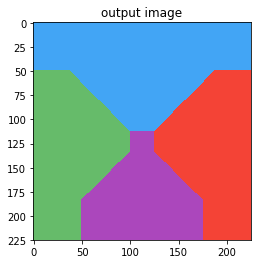

In [75]:
k,cluster_label,average_image,distance=generateCluster(4, count) #4 - cluster
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,xy,cluster_label)
pre_average_image=np.zeros((2,2), dtype=int)
energy=[]
accuracy=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(xy,average_image,cluster_label,distance)
    pre_average_image=average_image
    average_image=computeCentroid(k,xy,cluster_label)
    energy.append(computeEnergy(distance))
    num_iteration+=1
    for i in range(k):
        print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i])
average_image=visualization(average_image,k)
plotCentoidImages(average_image,cluster_label)